# Master Fig 1

In [1]:
library(ggplot2)
library(patchwork)

In [2]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")

## Load Subfigs

In [3]:
# UMAP + stats
daywise_umap = readRDS("./subfigs/20210729_daywise_umap.rds")
daywise_counts = readRDS("./subfigs/20210729_daywise_cell_count.rds")
clusterwise_umap = readRDS("./subfigs/20210729_clusterwise_umap.rds")
clusterwise_counts = readRDS("./subfigs/20210729_clusterwise_cell_count.rds")

rna_daywise_umap = readRDS("./subfigs/20210729_rna_daywise_umap.rds")
rna_daywise_counts = readRDS("./subfigs/20210729_rna_daywise_cell_count.rds")
rna_clusterwise_umap = readRDS("./subfigs/20210729_rna_clusterwise_umap.rds")
rna_clusterwise_counts = readRDS("./subfigs/20210729_rna_clusterwise_cell_count.rds")

# possible in supps?
# day_by_cluster = readRDS("./subfigs/20200707_day_by_cluster_breakdown.rds")
# cluster_by_day = readRDS("./subfigs/20200707_cluster_by_day_breakdown.rds")

In [4]:
# FRiP plots
fibroblast_frip = readRDS("./subfigs/20210801_fibroblast_frip.rds")
ipsc_frip = readRDS("./subfigs/20210801_ipsc_frip.rds")

In [5]:
# gene expr scores
fibroblast_expr_score = readRDS("./subfigs/20210729_fibroblast_expr_score.rds")
pluri_expr_score = readRDS("./subfigs/20210729_pluripotency_expr_score.rds")

In [6]:
# gene score heatmap
# gene_score_heatmap = readRDS("./subfigs/20200712_gene_score_ch_heatmap.rds")

In [7]:
# gene score plots
COL1A1_gs = readRDS("./subfigs/20210801_COL1A1_gs.rds")
FN1_gs = readRDS("./subfigs/20210801_FN1_gs.rds")
CDH1_gs = readRDS("./subfigs/20210801_CDH1_gs.rds")
NANOG_gs = readRDS("./subfigs/20210801_NANOG_gs.rds")

In [8]:
# single-cell gene expression plots
COL1A1_expr_sc = readRDS("./subfigs/20210801_COL1A1_expr_sc.rds")
FN1_expr_sc = readRDS("./subfigs/20210801_FN1_expr_sc.rds")
CDH1_expr_sc = readRDS("./subfigs/20210801_CDH1_expr_sc.rds")
NANOG_expr_sc = readRDS("./subfigs/20210801_NANOG_expr_sc.rds")

In [9]:
# cluster-wise browser shots
COL1A1 = readRDS("./subfigs/20210729_COL1A1_atac.rds")
FN1 = readRDS("./subfigs/20210729_FN1_atac.rds")
CDH1 = readRDS("./subfigs/20210729_CDH1_atac.rds")
NANOG = readRDS("./subfigs/20210729_NANOG_atac.rds")

COL1A1_gene = readRDS("./subfigs/20210729_COL1A1_atac_gene.rds")
FN1_gene = readRDS("./subfigs/20210729_FN1_atac_gene.rds")
CDH1_gene = readRDS("./subfigs/20210729_CDH1_atac_gene.rds")
NANOG_gene = readRDS("./subfigs/20210729_NANOG_atac_gene.rds")

# browser_labels = readRDS("./subfigs/20200921_browser_labels.rds")

# cluster-wise gene expression 
COL1A1_expr = readRDS("./subfigs/20210729_COL1A1_expr.rds")
FN1_expr = readRDS("./subfigs/20210729_FN1_expr.rds")
CDH1_expr = readRDS("./subfigs/20210729_CDH1_expr.rds")
NANOG_expr = readRDS("./subfigs/20210729_NANOG_expr.rds")

### Configs

In [10]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

rownames(cluster_config) = cluster_config$cluster
cluster_config

cluster colour  description            new_cluster
1   1      #B03743 Fibroblast              1         
2   2      #E85F6D Fibroblast-like         3         
3   3      #7C2730 Fibroblast-like         2         
4   4      #F0A118 Intermediate           12         
5   5      #78A824 Pre-iPSC               13         
6   6      #A6D854 Pre-iPSC               14         
7   7      #F01D35 Fibroblast-like         5         
8   8      #13C4A3 iPSC                   15         
9   9      #406614 Partially-reprogrammed 10         
10 10      #D4B81C Intermediate            9         
11 11      #006658 High OSK                8         
12 12      #CF175A Fibroblast-like         4         
13 13      #F7A6C2 Keratinocyte-like       6         
14 14      #F4D5CD Intermediate           11         
15 15      #F0520A Low OSK                 7

In [11]:
# slight tweak for long name
cluster_config[9, "description"] = "Partial"

## Assemble Components

In [12]:
horizontal_spacers <- function(plot, widths=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), widths=widths)
}

vertical_spacers <- function(plot, heights=c(0,1,0)) {
    wrap_plots(plot_spacer(), plot, plot_spacer(), ncol=1, heights=heights)
}

placeholder_plot <- function(text, size=1) {
    df = data.frame(x=c(0), y=c(0), t=c(text))
    ggplot(df)+
    geom_text(aes(x=x,y=y,label=t), size=size)+
    theme_void()+
    theme(panel.border = element_rect(colour = "black", fill=NA, size=0.5),
                                                       plot.margin = unit(c(0,0,0,0), "pt"))
}

### UMAPs

In [13]:
atac_cell_counts_stacked = wrap_plots(list(daywise_counts, clusterwise_counts), ncol=1, heights=c(1,2))

In [14]:
rna_cell_counts_stacked = wrap_plots(list(rna_daywise_counts, rna_clusterwise_counts), ncol=1, heights=c(1,2))

In [15]:
atac_umaps_combined = wrap_plots(plot_spacer(),
                            daywise_umap + theme(plot.margin = unit(c(0,0,0,0), "pt")), 
                            plot_spacer(),
                            clusterwise_umap + theme(plot.margin = unit(c(0,0,0,0), "pt")), 
                            atac_cell_counts_stacked,
                            plot_spacer(),
                            widths=c(0,9,0,9,1,0.2))

rna_umaps_combined = wrap_plots(plot_spacer(),
                            rna_daywise_umap + theme(plot.margin = unit(c(0,0,0,0), "pt")), 
                            plot_spacer(),
                            rna_clusterwise_umap + theme(plot.margin = unit(c(0,0,0,0), "pt")), 
                            rna_cell_counts_stacked,
                            plot_spacer(),
                            widths=c(0,9,0,9,1,0.2))

umaps_combined = wrap_plots(atac_umaps_combined,
                           rna_umaps_combined,
                           ncol=1,
                           heights=c(8,8))

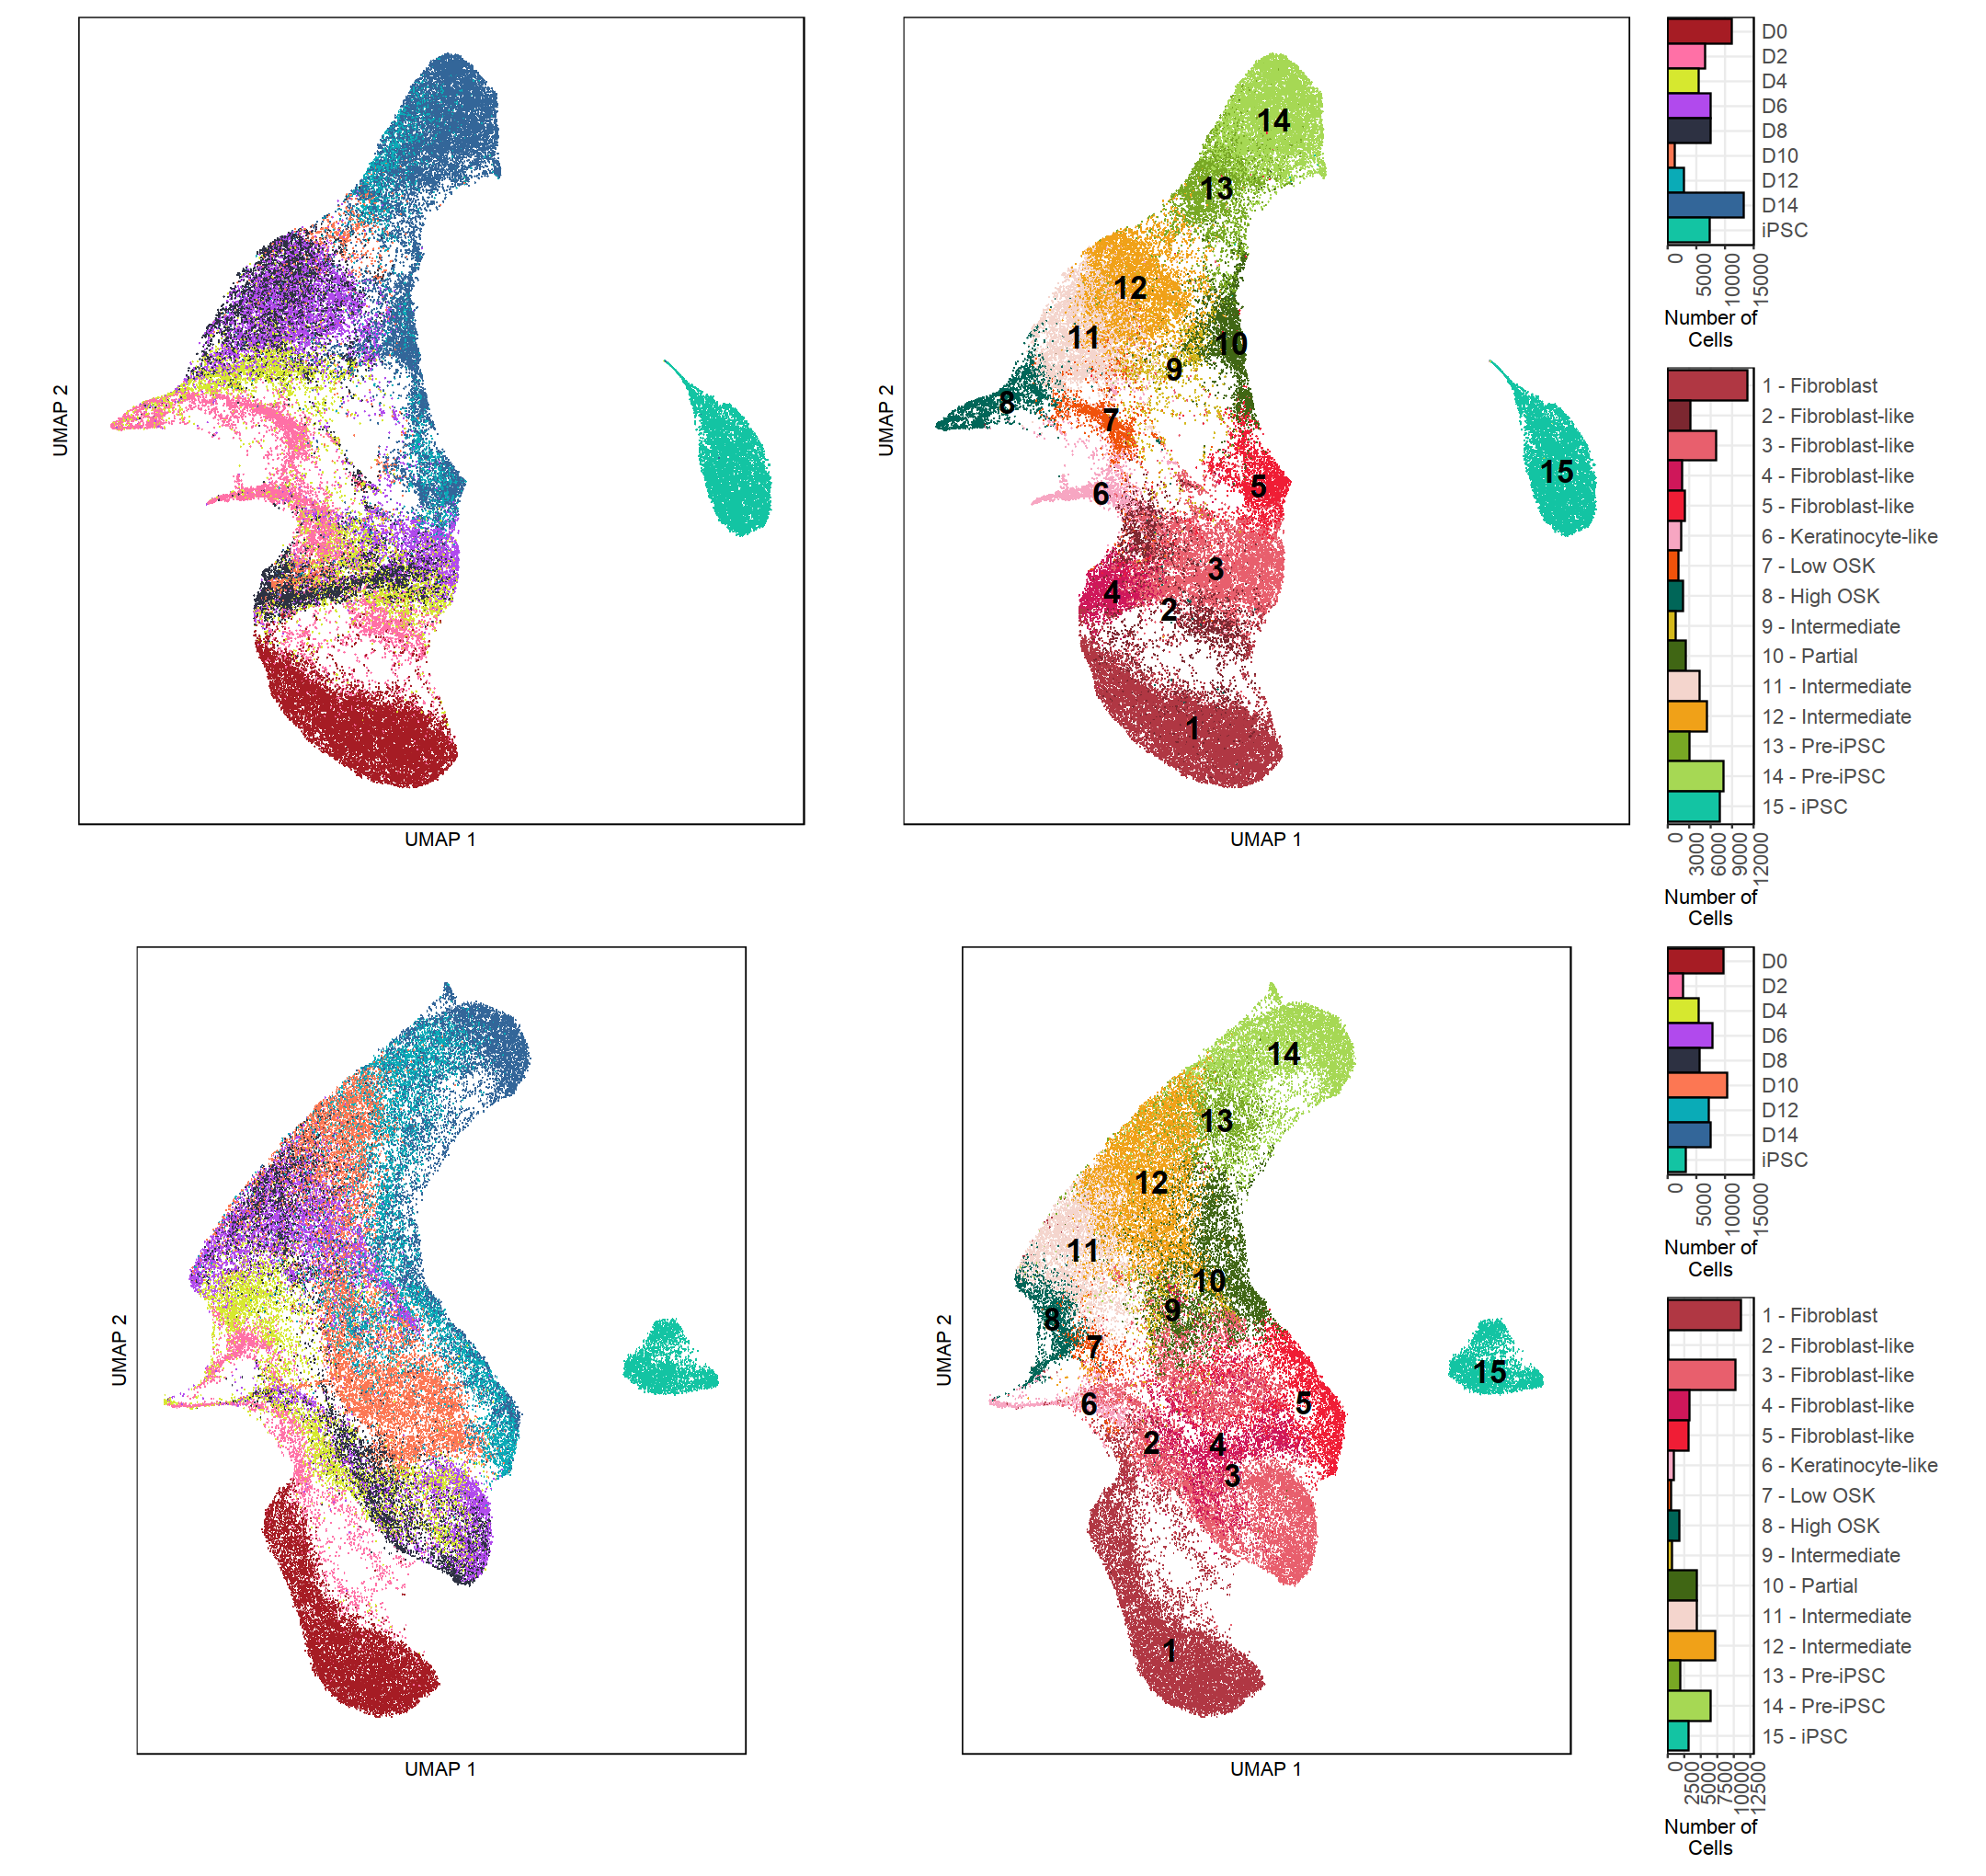

In [16]:
options(repr.plot.width = 18, repr.plot.height = 17)
umaps_combined

### Day x Cluster Breakdown

In [17]:
# composition_plot = wrap_plots(day_by_cluster, 
#            plot_spacer(), # otherwise "Day overlaps with plot below" 
#            cluster_by_day,
#            ncol=1,
#            heights=c(5,0,5))

# # y padding
# composition_plot = vertical_spacers(composition_plot,
#                        heights=c(1,5,1))

In [18]:
# options(repr.plot.width = 10, repr.plot.height = 8)
# composition_plot

### FRiP Plot

In [40]:
frip_plots = wrap_plots(fibroblast_frip, 
#                         plot_spacer(), # otherwise "Day overlaps with plot below" 
                        ipsc_frip,
                        nrow=2)

# y padding
# frip_plots = vertical_spacers(frip_plots,
#                        heights=c(0.5,9,0.5))

In [43]:
expr_score_plots = wrap_plots(fibroblast_expr_score,
                              pluri_expr_score,
                              nrow=2)

# y padding
# expr_score_plots = vertical_spacers(frip_plots,
#                        heights=c(0.5,9,0.5))

### Row 1: Col 1

In [46]:
row1_col1_plots = horizontal_spacers(wrap_plots(vertical_spacers(placeholder_plot("SCHEMATIC", 10)),
                            wrap_plots(frip_plots, expr_score_plots, nrow=1),
                            heights=c(10,7)),
                                     c(0.1,8.9,0))

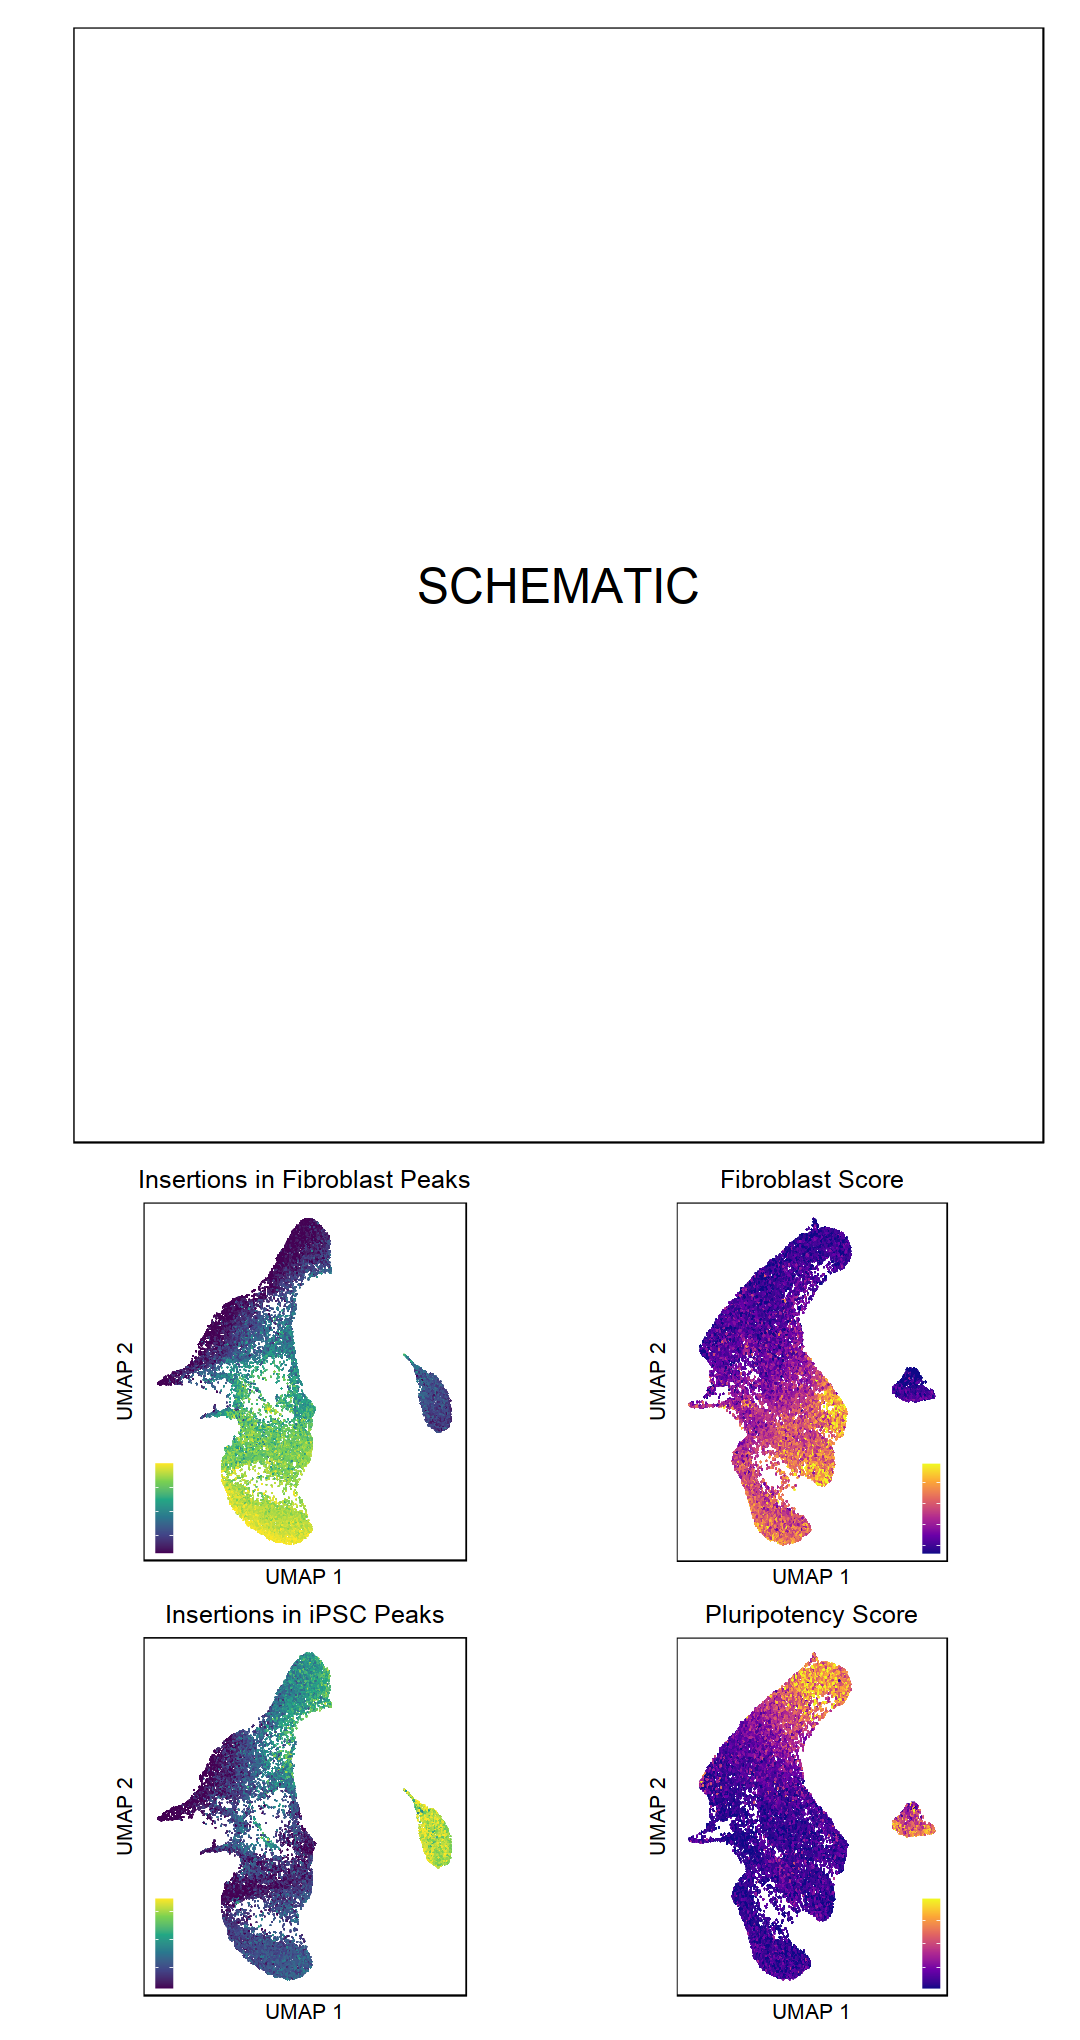

In [48]:
options(repr.plot.width = 9, repr.plot.height = 17)
row1_col1_plots

### Browser Shots with Gene Scores

In [23]:
cluster_label_df = cluster_config

# BOTTOM_PT = nrow(cluster_label_df)+0

# cluster_label_df[nrow(cluster_label_df)+1, ] = c(nrow(cluster_label_df)+1, "", "", 1)
# cluster_label_df[nrow(cluster_label_df)+1, ] = c(nrow(cluster_label_df)+1, "", "", BOTTOM_PT)

# need to play around with these parameters to find the right fit
cluster_labels_plot <- ggplot(cluster_label_df) +
    geom_text(aes(x=0, y= -as.numeric(new_cluster), label=description, hjust=1, vjust=0.5)) +
    theme_void() +
    theme(plot.margin = unit(c(0,-105,0,0), "pt"))
# wrap
cluster_labels_plot = wrap_plots(plot_spacer(), cluster_labels_plot, plot_spacer(), widths=c(0,1,0))


# add to debug- shows how ggplot dots align with genome track labels
# for (i in seq(1,18)) {
#     cluster_labels_plot = cluster_labels_plot + geom_point(x=0, y= -i)
# }

# cluster_labels_plot = cluster_labels_plot + geom_point(x=0, y= -BOTTOM_PT, colour='red')

In [24]:
# GS_TO_BROWSER_RATIO = c(10, 4)
# GS_HORIZONTAL_SPACERS = c(1,8,1)

top_plots = wrap_plots(cluster_labels_plot,
                    COL1A1,
                    COL1A1_expr,
                    plot_spacer(),                    
                    FN1,
                    FN1_expr,
                    plot_spacer(),
                    CDH1,
                    CDH1_expr,
                    plot_spacer(),
                    NANOG,
                    NANOG_expr,
                    widths=c(2,5.5,1,0,5.5,1,0,5.5,1,0,5.5,1))

bottom_plots = wrap_plots(
    plot_spacer(),
    COL1A1_gene,
    plot_spacer(),
    FN1_gene,
    plot_spacer(),
    CDH1_gene,
    plot_spacer(),
    NANOG_gene,
    plot_spacer(),
    widths=c(2,5.5,1,5.5,1,5.5,1,5.5,1)
)

atac_plus_expr = wrap_plots(top_plots, bottom_plots, heights=c(11,1))

In [25]:
gs_plus_expr = wrap_plots(
    plot_spacer(),
    COL1A1_gs,
    COL1A1_expr_sc,
    FN1_gs,
    FN1_expr_sc,
    CDH1_gs,
    CDH1_expr_sc,
    NANOG_gs,
    NANOG_expr_sc,
    widths=c(2,3.25,3.25,3.25,3.25,3.25,3.25,3.25,3.25))

In [57]:
browser_shots = wrap_plots(horizontal_spacers(atac_plus_expr),
                          vertical_spacers(horizontal_spacers(gs_plus_expr)),
                          heights=c(12,3))

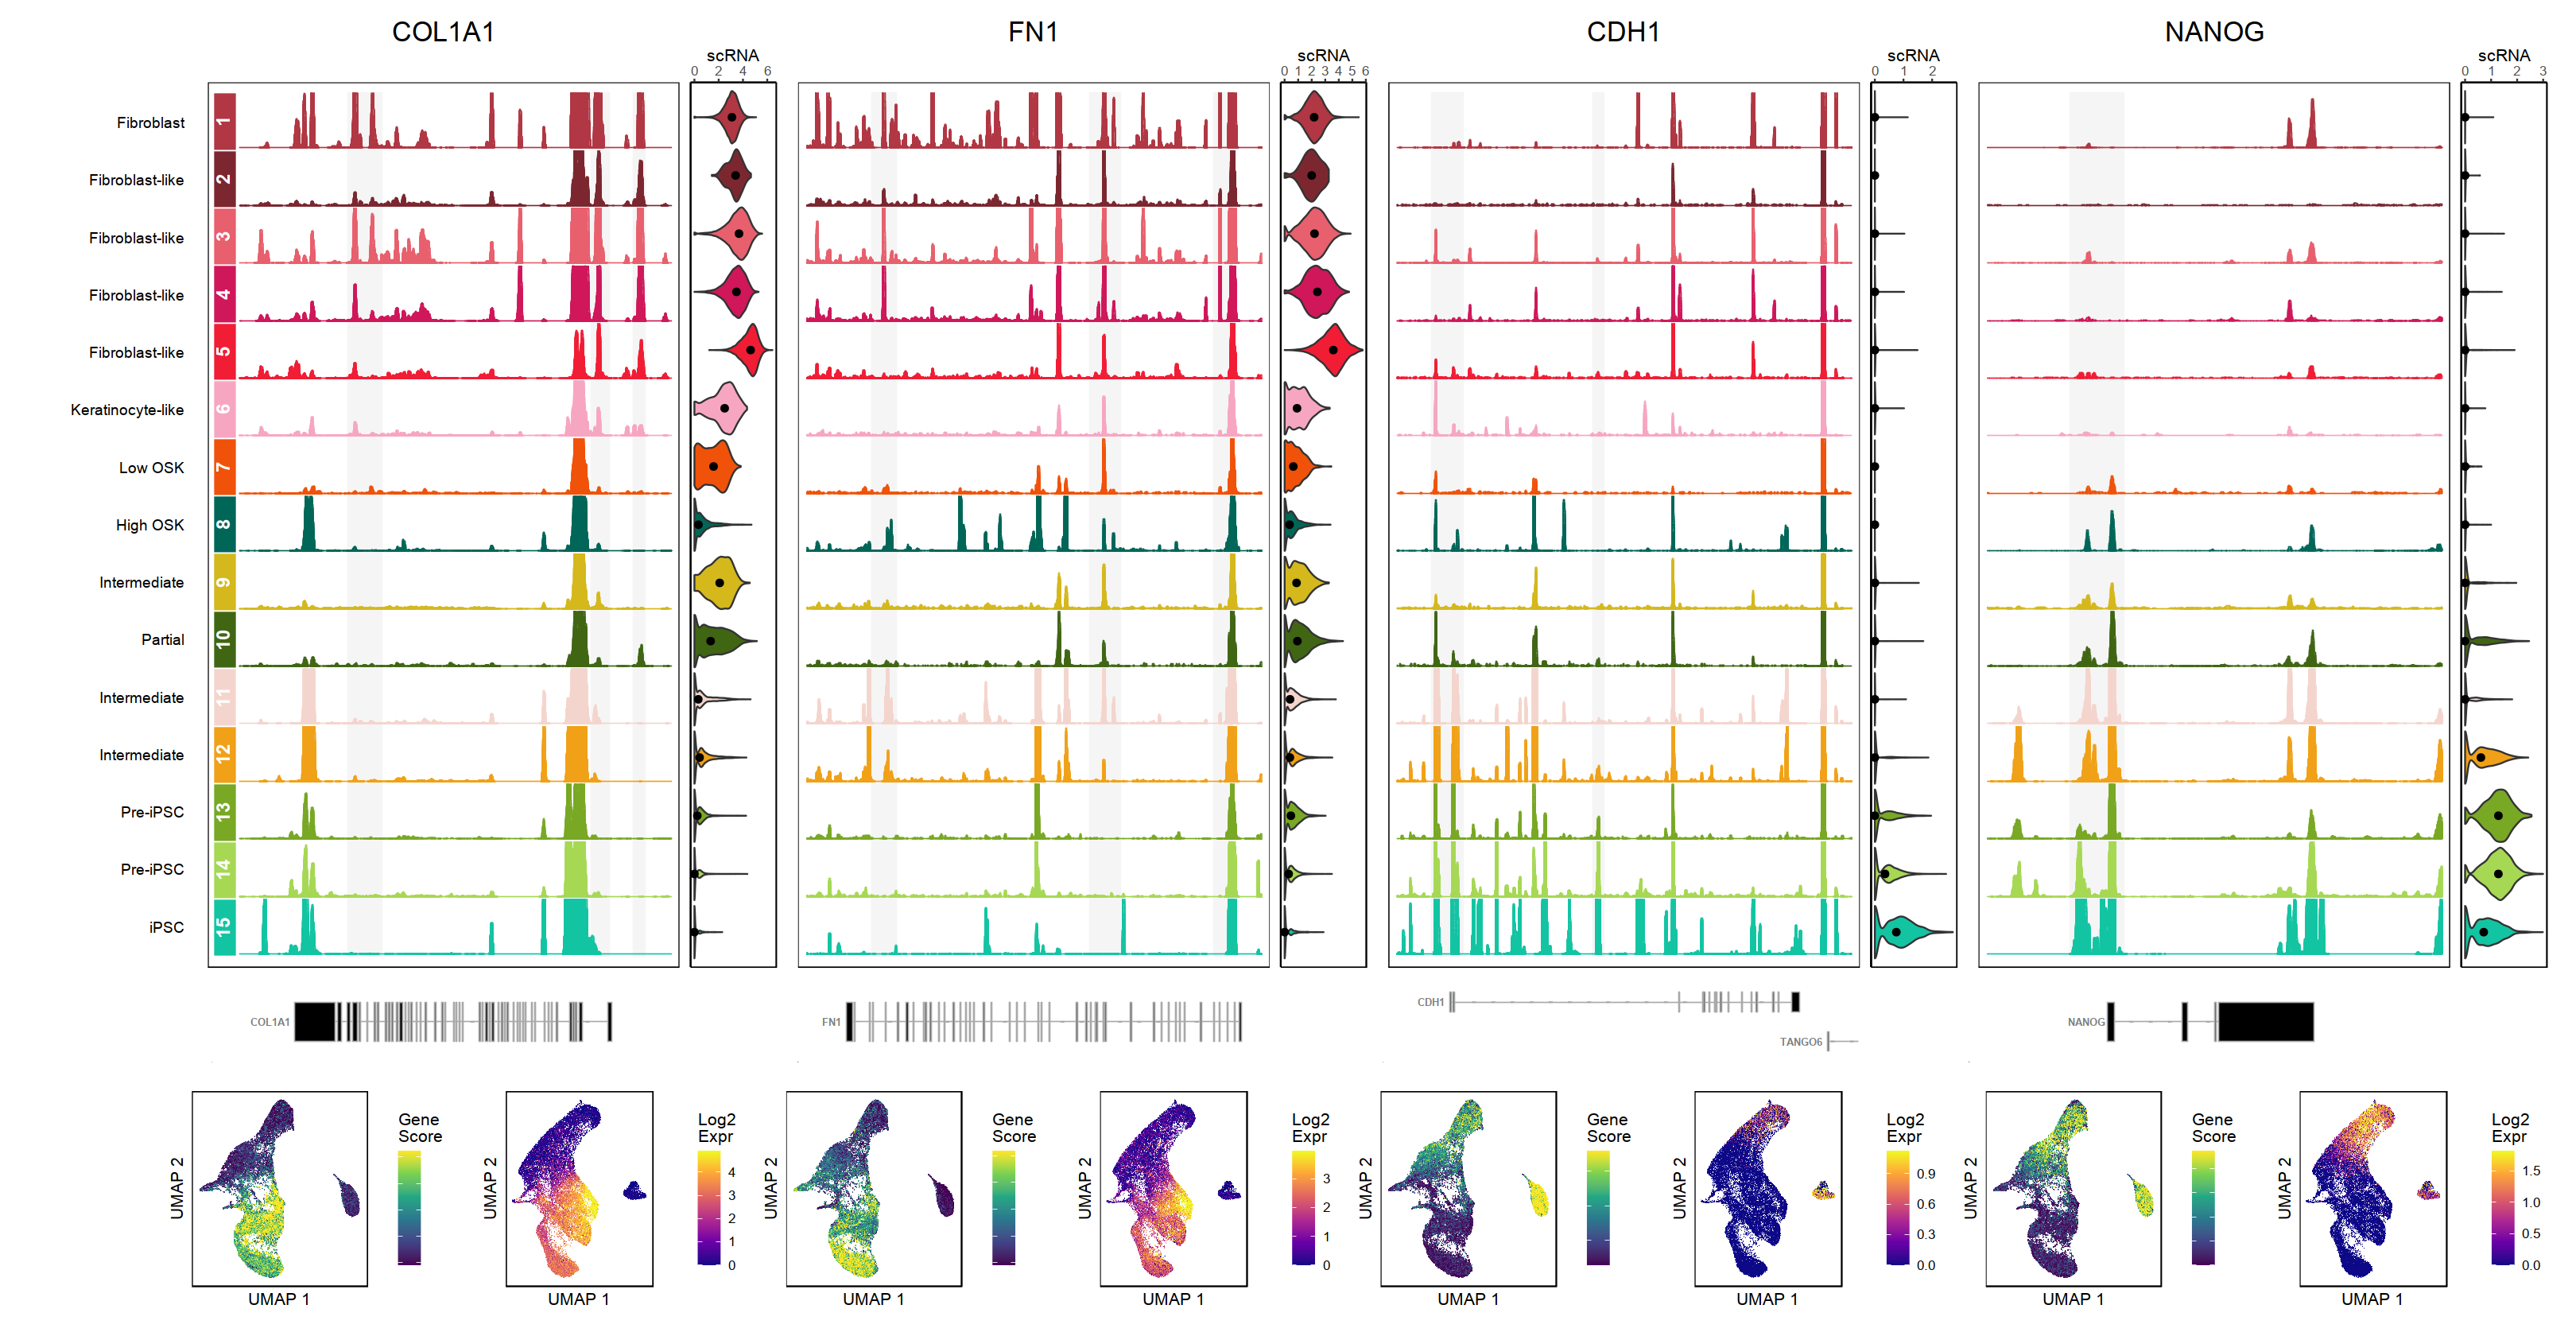

In [58]:
options(repr.plot.width = 27, repr.plot.height = 14)

browser_shots

## Assemble Master

In [59]:
main_fig = wrap_plots(wrap_plots(row1_col1_plots,
                                 vertical_spacers(umaps_combined), 
                                 widths=c(9,18)),                                  
                      browser_shots, 
                      ncol=1, heights=c(17,14))

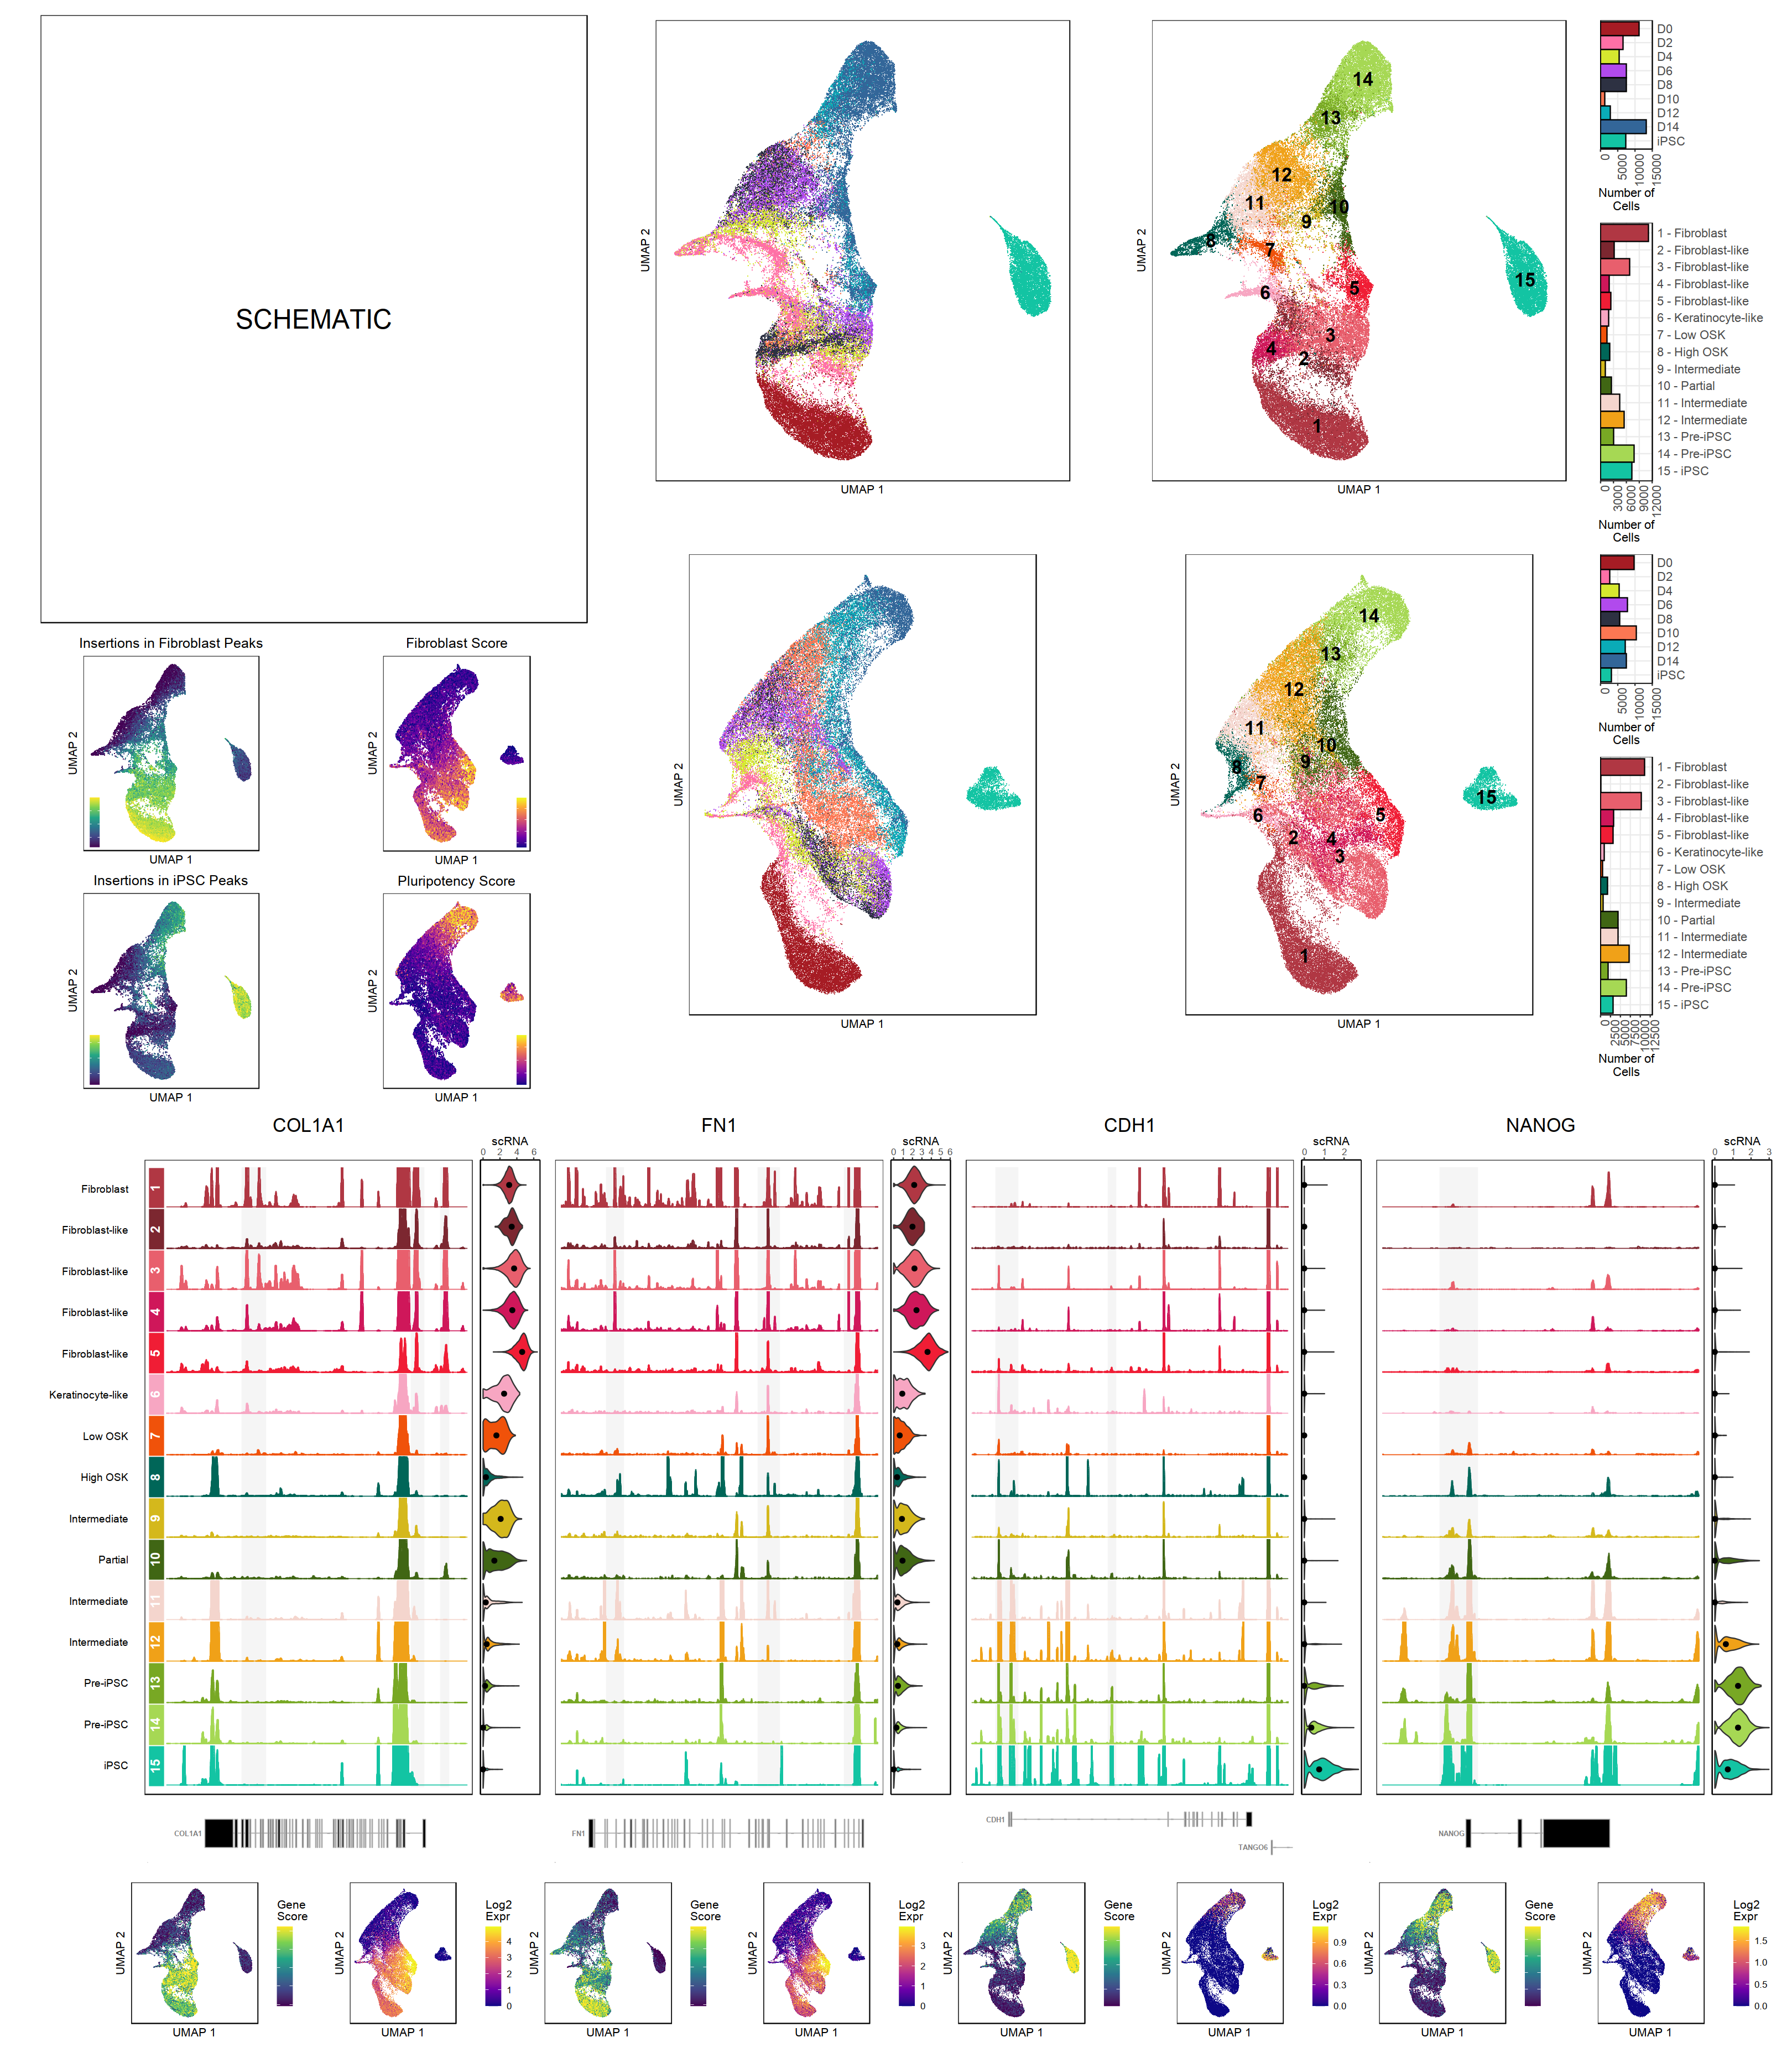

In [60]:
options(repr.plot.width = 27, repr.plot.height = 31)
main_fig

In [61]:
ggsave("./pdfs/Fig1.pdf", main_fig, height=31, width=27)

---

In [63]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] pillar_1.4.6        compiler_3.6.3      BiocManager_1.30.10
 [4] base64enc_0.1-3     tools_3.6.3         digest_0.6.25      
 [7] uuid_0.1-4          jsonlite_1.6.1      evaluate_0.14      
[10] lifecycle_0.2.0    